In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
import scipy. stats as stats
import pylab

In [2]:
drug = pd. read_csv("Projectfinaldata.csv")
drug. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


In [3]:
##removing unwanted columns

df = drug. drop(["Typeofsales","Patient_ID", "Specialisation","ReturnQuantity","Dept", "Formulation",
                   "SubCat", "SubCat1", "RtnMRP","Final_Cost"], axis = 1)

In [4]:
df.head()

,Dateofbill,Quantity,Final_Sales,DrugName
0,6/1/2022,1,59.260,ZINC ACETATE 20MG/5ML SYP
1,7/23/2022,1,950.800,CEFTAZIDIME 2GM+AVIBACTAM 500MG
2,6/23/2022,1,4004.214,EPTIFIBATIDE 0.75MG/ML
3,3/17/2022,2,81.044,WATER FOR INJECTION 10ML SOLUTION
4,12/21/2022,1,40.504,LORAZEPAM 1MG


In [5]:
duplicate = df. duplicated()
sum(duplicate) # having duplicate values

1114

In [6]:
df. isna(). sum() # having too many null values need to drop those null values

Dateofbill        0
Quantity          0
Final_Sales       0
DrugName       1668
dtype: int64

In [7]:
from sklearn. impute import SimpleImputer

In [8]:
mode_imputer = SimpleImputer(missing_values = np. nan, strategy = "most_frequent")
df["DrugName"] = pd.DataFrame(mode_imputer. fit_transform(df[["DrugName"]]))
df. isna(). sum()

Dateofbill     0
Quantity       0
Final_Sales    0
DrugName       0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Dateofbill'], format = '%m/%d/%Y')
df. sort_values("Date", inplace=True) # sorts the data as per date year month

In [10]:
df. head()

,Dateofbill,Quantity,Final_Sales,DrugName,Date
10890,1/1/2022,2,82.588,HALOPERIDOL 5MG/1ML INJ,2022-01-01
2268,1/1/2022,2,111.720,SODIUM CHLORIDE 0.9%,2022-01-01
1863,1/1/2022,2,87.096,SODIUM CHLORIDE 0.9%,2022-01-01
11537,1/1/2022,1,40.972,ASPIRIN 75MG,2022-01-01
10900,1/1/2022,0,0.000,ENOXAPARIN 60MG,2022-01-01


In [11]:
df_new = df. iloc[:,1:] #removing dateofbill columns

In [12]:
df_new

,Quantity,Final_Sales,DrugName,Date
10890,2,82.588,HALOPERIDOL 5MG/1ML INJ,2022-01-01
2268,2,111.720,SODIUM CHLORIDE 0.9%,2022-01-01
1863,2,87.096,SODIUM CHLORIDE 0.9%,2022-01-01
11537,1,40.972,ASPIRIN 75MG,2022-01-01
10900,0,0.000,ENOXAPARIN 60MG,2022-01-01
...,...,...,...,...
1634,1,42.906,ONDANSETRON 2MG/ML,2022-12-31
3280,1,63.900,CALCIUM 500MG + VITAMIN D3 250IU,2022-12-31
13682,3,121.728,WATER FOR INJECTION 10ML SOLUTION,2022-12-31
808,3,145.200,SODIUM CHLORIDE IVF 100ML,2022-12-31


((array([-3.89672955, -3.67627354, -3.55545265, ...,  3.55545265,
          3.67627354,  3.89672955]),
  array([  0,   0,   0, ..., 100, 100, 150], dtype=int64)),
 (2.656557783634374, 2.231748487832325, 0.5175248741067767))

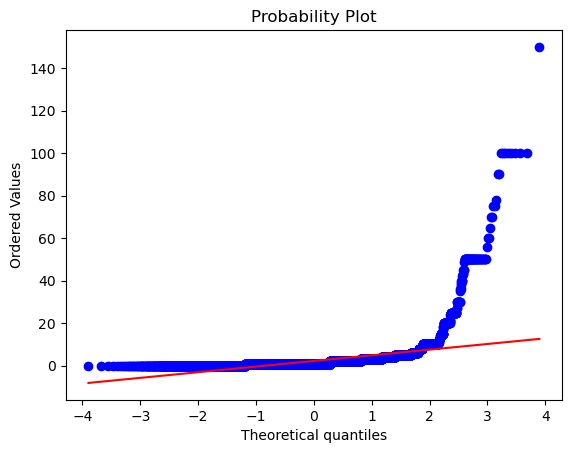

In [13]:
# Checking Whether data is normally distributed
stats.probplot(df_new. Quantity, dist="norm", plot=pylab)

C:\Users\debna\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\debna\anaconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


((array([-3.89672955, -3.67627354, -3.55545265, ...,  3.55545265,
          3.67627354,  3.89672955]),
  array([      -inf,       -inf,       -inf, ..., 4.60517019, 4.60517019,
         5.01063529])),
 (nan, nan, nan))

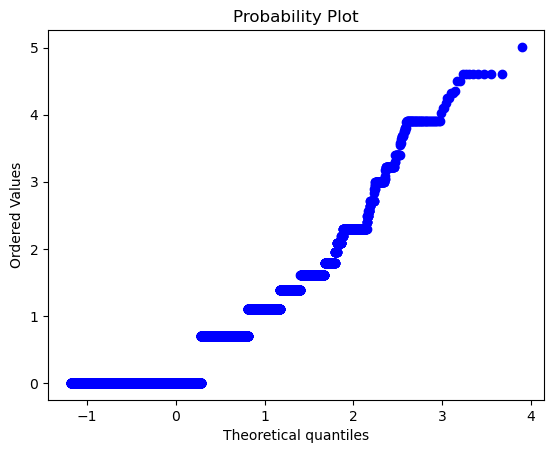

In [14]:
#transformation to make variable normal
stats.probplot(np.log(df_new. Quantity),dist="norm",plot=pylab)

In [15]:
#Sales Data Per Item
item_sales_per_Quantity = df_new.groupby(['Date', 'DrugName'])['Quantity'].sum()
item_sales_per_Quantity

Date        DrugName                                                                                                                                                                                                               
2022-01-01  ASPIRIN 75MG                                                                                                                                                                                                                2
            CEFTRIAXONE 1GM                                                                                                                                                                                                             2
            DEXTROSE 10%W/V 500ML IVF                                                                                                                                                                                                   3
            ENOXAPARIN 40MG                                           

In [16]:
drug_qty = item_sales_per_Quantity.reset_index()

In [17]:
drug_qty. tail()

,Date,DrugName,Quantity
10326,2022-12-31,SODIUM CHLORIDE 0.9% IVF 1000ML,2
10327,2022-12-31,SODIUM CHLORIDE IVF 100ML,36
10328,2022-12-31,SULPHAMETHOXAZOLE 200MG + TRIMETHOPRIM 40MG,1
10329,2022-12-31,VITAMIN B12 + FOLIC ACID + IRON HYDROCHLORIDE\...,1
10330,2022-12-31,WATER FOR INJECTION 10ML SOLUTION,3


In [18]:
drug_qty = drug_qty. drop(["DrugName"], axis = 1)

In [19]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(drug_qty['Quantity'])

In [21]:
test_result

(-27.368376223072474,
 0.0,
 18,
 10312,
 {'1%': -3.4309843026143567,
  '5%': -2.861820324957927,
  '10%': -2.566919211830982},
 72285.4966180308)

In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(drug_qty['Quantity'])

ADF Test Statistic : -27.368376223072474
p-value : 0.0
#Lags Used : 18
Number of Observations Used : 10312
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [32]:
data_day_sum= drug_qty.resample('D', on='Date').sum()
data_day_sum.index= pd.to_datetime(data_day_sum.index).strftime('%Y-%m-%d')
data_day_sum['Date']= data_day_sum.index
data_day_sum= pd.DataFrame(data_day_sum[['Date',"Quantity"]])
data_day_sum= data_day_sum.reset_index(level=0, drop=True)
data_day_sum.head()

,Date,Quantity
0,2022-01-01,50
1,2022-01-02,65
2,2022-01-03,92
3,2022-01-04,86
4,2022-01-05,72


<AxesSubplot: >

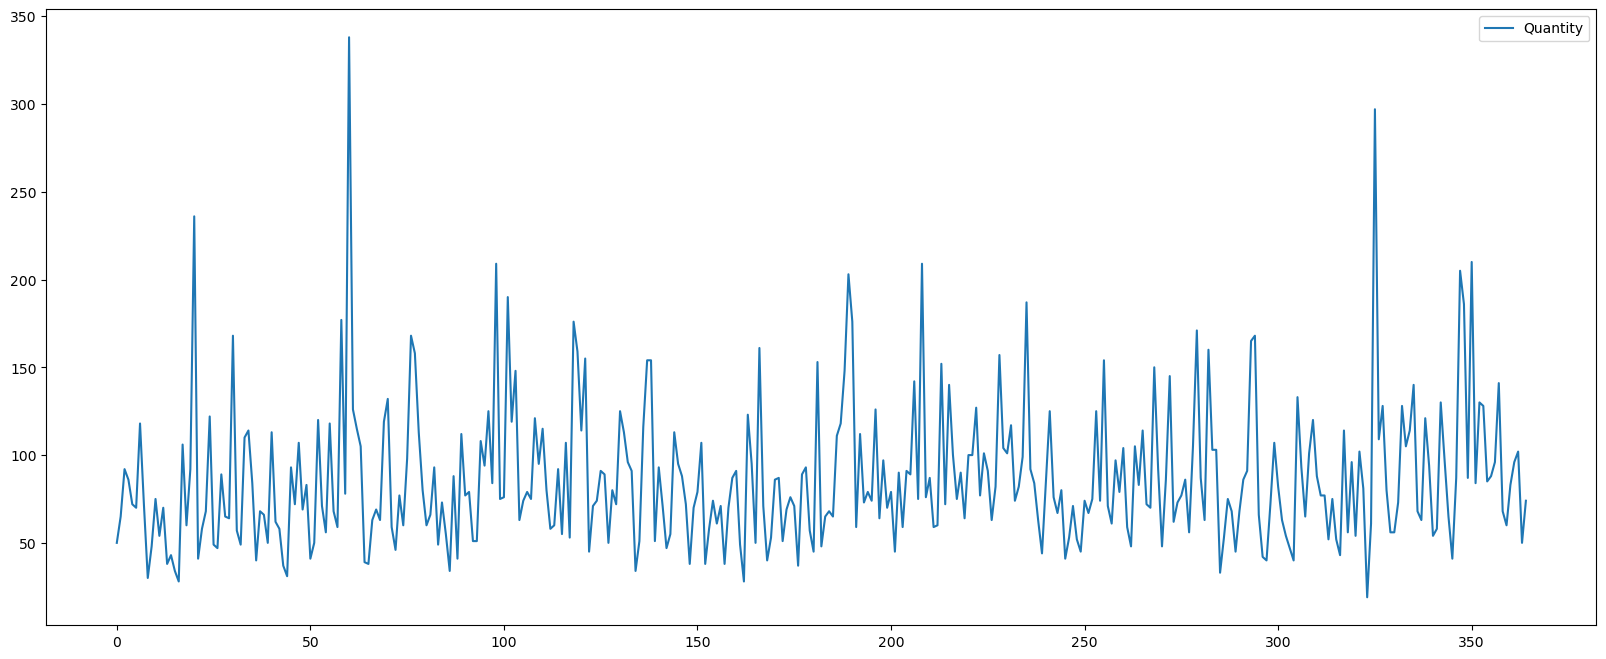

In [25]:
data_day_sum.plot(figsize=(20, 8))

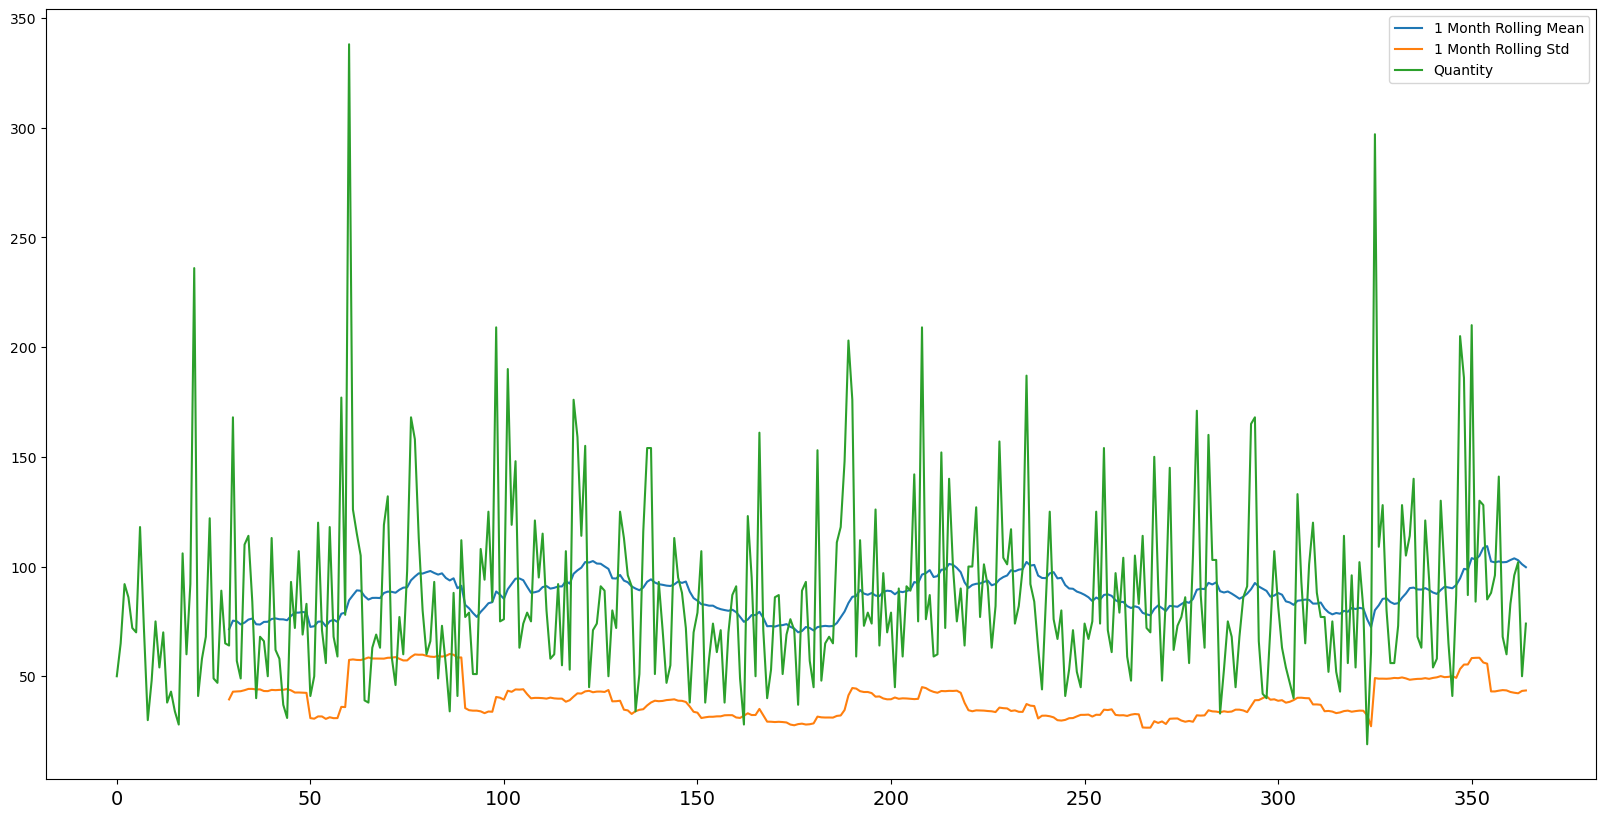

In [26]:
plt.figure(figsize=(20,10))
timeseries= data_day_sum["Quantity"]
timeseries.rolling(30).mean().plot(label='1 Month Rolling Mean')
timeseries.rolling(30).std().plot(label='1 Month Rolling Std')
timeseries.plot()
plt.legend()
plt.xticks(fontsize=14)
plt.show();

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_day_sum["Quantity"])  

#figure= plt.figure()  
decomposition.plot().set_size_inches(20, 50)
plt.xticks(fontsize=12, rotation=90);

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [30]:
data_month_sum= drug_qty.resample('M', on='Date').sum()
data_month_sum.index= pd.to_datetime(data_month_sum.index).strftime('%Y-%m')
data_month_sum['year_month']= data_month_sum.index
data_month_sum= pd.DataFrame(data_month_sum[['year_month',"Quantity"]])
data_month_sum= data_month_sum.reset_index(level=0, drop=True)
data_month_sum.head()

,year_month,Quantity
0,2022-01,2310
1,2022-02,2123
2,2022-03,2815
3,2022-04,2948
4,2022-05,2647


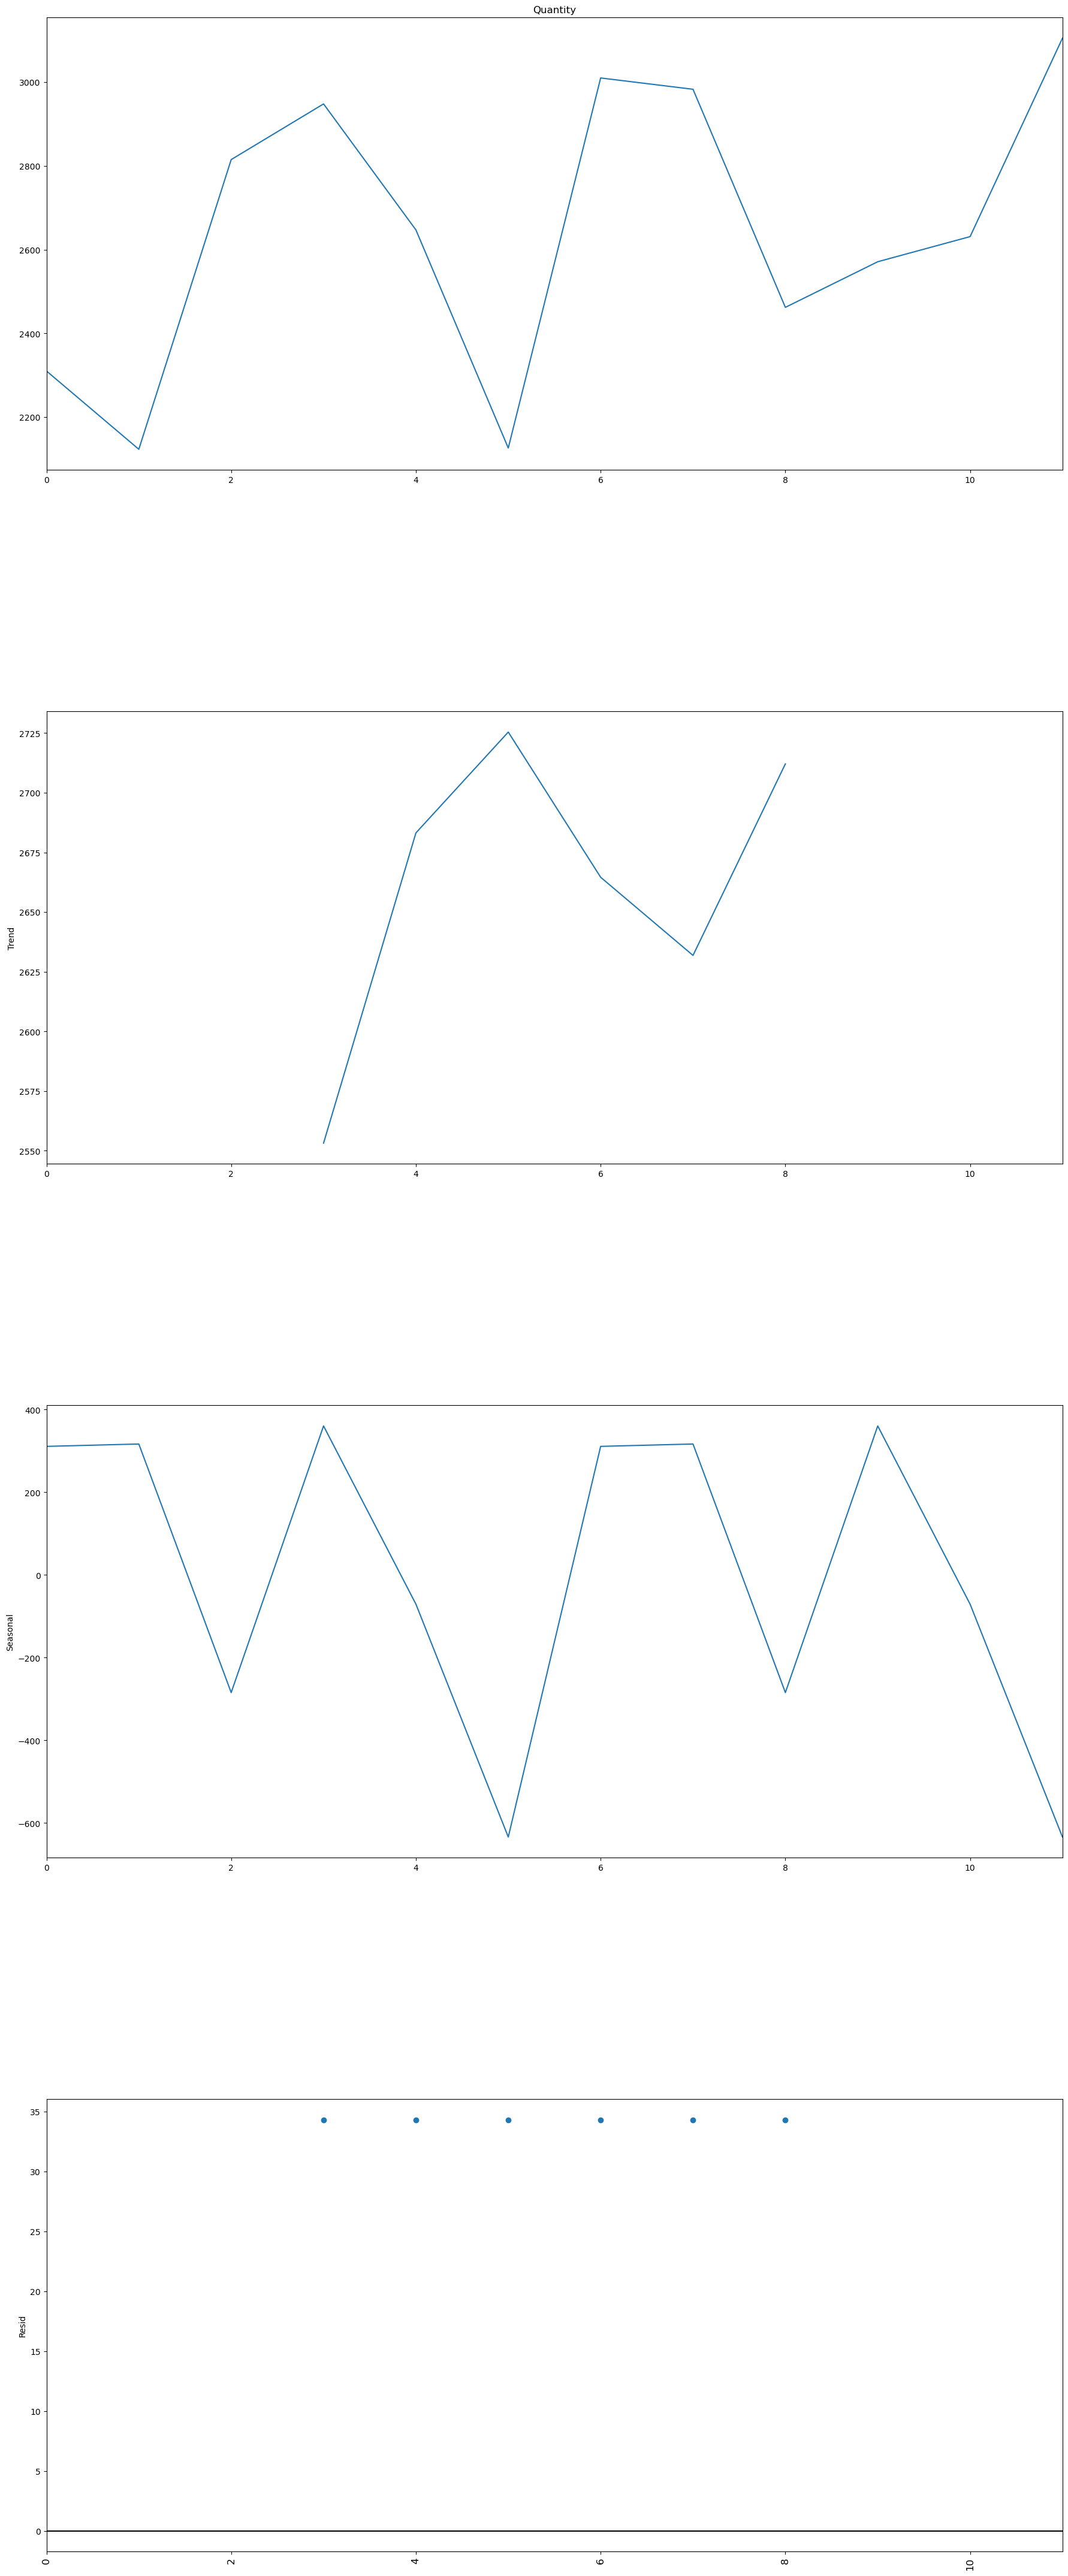

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_month_sum["Quantity"], period=6)  

#figure= plt.figure()  
decomposition.plot().set_size_inches(20, 50)
plt.xticks(fontsize=12, rotation=90);

In [35]:
import os
data_day_sum.to_csv("DayForecast.csv", index = False)


In [36]:
data_day_sum

,Date,Quantity
0,2022-01-01,50
1,2022-01-02,65
2,2022-01-03,92
3,2022-01-04,86
4,2022-01-05,72
...,...,...
360,2022-12-27,83
361,2022-12-28,96
362,2022-12-29,102
363,2022-12-30,50
